In [1]:
# import tensorflow as tf
from glob import glob
from os.path import join
from tensorflow.keras import layers, models
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imports.GDL_layers as GDL_layers

2022-08-29 10:09:29.179558: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## Load data

In [2]:
# Find a list of all the datafiles
patch_path = "/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/"
patch_files = sorted(glob(join(patch_path, "*.nc")))
patch_ds = xr.open_dataset(patch_files[0])
csv_path = "/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/"
csv_files = sorted(glob(join(csv_path, "track_step_*.csv")))
meta_ds = pd.read_csv(csv_files[0])

In [3]:
patch_files[0]

'/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20101024-0000_d01_model_patches.nc'

In [4]:
int(150*.8)

120

In [5]:
patch_files[149]

'/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20120614-0000_d01_model_patches.nc'

In [6]:
patch_ds

<xarray.Dataset>
Dimensions:           (p: 370, row: 144, col: 144)
Coordinates:
  * p                 (p) int32 0 1 2 3 4 5 6 7 ... 363 364 365 366 367 368 369
  * row               (row) int32 0 1 2 3 4 5 6 ... 137 138 139 140 141 142 143
  * col               (col) int32 0 1 2 3 4 5 6 ... 137 138 139 140 141 142 143
Data variables: (12/26)
    lon               (p, row, col) float32 ...
    lat               (p, row, col) float32 ...
    i                 (p, row, col) int32 ...
    j                 (p, row, col) int32 ...
    x                 (p, row, col) float32 ...
    y                 (p, row, col) float32 ...
    ...                ...
    MLCAPE_prev       (p, row, col) float32 ...
    USHR6_prev        (p, row, col) float32 ...
    VSHR6_prev        (p, row, col) float32 ...
    SBLCL_prev        (p, row, col) float32 ...
    U_BUNK_prev       (p, row, col) float32 ...
    V_BUNK_prev       (p, row, col) float32 ...
Attributes: (12/36)
    Conventions:             CF-1.6
    title:                   NCARSTORM Storm Patches for run 20101024-0000 me...
    object_variable:         REFL_COM
    start_hour:              12
    end_hour:                35
    HRRR_alt_end_hour:       46
    ...                      ...
    single_step:             True
    label_type:              gamma
    model_map_file:          /glade/work/cbecker/hagelslag/mapfiles/ncar_stor...
    mask_file:               None
    run_date_format:         %Y%m%d-%H%M
    json:                    False

In [7]:
meta_ds

,Step_ID,Track_ID,Ensemble_Name,Ensemble_Member,Run_Date,Valid_Date,Forecast_Hour,Valid_Hour_UTC,Duration,Centroid_Lon,...,eccentricity,major_axis_length,minor_axis_length,orientation,Matched,Max_Hail_Size,Num_Matches,Shape,Location,Scale
0,d01_REFL_COM_20101024-0000_12_13_000_00,d01_REFL_COM_20101024-0000_12_13_000,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-98.41019,...,0.90735,51.23550,21.53869,1.41172,0,0,0,0,0,0
1,d01_REFL_COM_20101024-0000_12_13_000_01,d01_REFL_COM_20101024-0000_12_13_000,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 13:00:00+00:00,13,13,2,-97.69198,...,0.85356,26.92719,14.02906,1.13923,0,0,0,0,0,0
2,d01_REFL_COM_20101024-0000_12_12_001_00,d01_REFL_COM_20101024-0000_12_12_001,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-95.15486,...,0.71815,8.65894,6.02569,0.74301,0,0,0,0,0,0
3,d01_REFL_COM_20101024-0000_12_13_002_00,d01_REFL_COM_20101024-0000_12_13_002,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-94.39792,...,0.58687,7.89825,6.39509,-1.28875,0,0,0,0,0,0
4,d01_REFL_COM_20101024-0000_12_13_002_01,d01_REFL_COM_20101024-0000_12_13_002,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 13:00:00+00:00,13,13,2,-94.21008,...,0.91899,27.65443,10.90375,0.32912,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,d01_REFL_COM_20101024-0000_35_35_238_00,d01_REFL_COM_20101024-0000_35_35_238,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-85.94177,...,0.44428,6.31100,5.65396,1.29480,0,0,0,0,0,0
366,d01_REFL_COM_20101024-0000_35_35_239_00,d01_REFL_COM_20101024-0000_35_35_239,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-85.16997,...,0.85947,79.05277,40.41106,0.12811,0,0,0,0,0,0
367,d01_REFL_COM_20101024-0000_35_35_240_00,d01_REFL_COM_20101024-0000_35_35_240,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-88.18374,...,0.92145,18.05184,7.01316,0.99009,0,0,0,0,0,0
368,d01_REFL_COM_20101024-0000_35_35_241_00,d01_REFL_COM_20101024-0000_35_35_241,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-82.50549,...,0.93744,14.44305,5.02817,-0.19595,0,0,0,0,0,0


In [8]:
# Pull selected variables from patch files and join into a single DataSet
num_files = 150
variables = ["i", "j", "REFL_COM_curr"]
data_list = []
for p, patch_file in enumerate(patch_files[0:num_files]):
    if p % 10 == 0:
        print(p, patch_file)
    ds = xr.open_dataset(patch_file)
    data_list.append(ds[variables].compute())
    ds.close()
data = xr.concat(data_list, dim="p")
data['p'] = np.arange(data['p'].shape[0])

0 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20101024-0000_d01_model_patches.nc
10 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110201-0000_d01_model_patches.nc
20 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110326-0000_d01_model_patches.nc
30 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110414-0000_d01_model_patches.nc
40 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110425-0000_d01_model_patches.nc
50 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110522-0000_d01_model_patches.nc
60 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110605-0000_d01_model_patches.nc
70 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110615-0000_d01_model_patches.nc
80 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110625-0000_d01_model_patches.nc
90 /glade/scratch/lverhoef/WR

In [9]:
# Pull variables from csv files and join into an array
csv_variables = ["major_axis_length", "minor_axis_length", "U_BUNK-potential_mean", "V_BUNK-potential_mean"]
csv_data_list = []
for p, csv_file in enumerate(csv_files[0:num_files]):
    if p % 10 == 0:
        print(p, csv_file)
    csv_ds = pd.read_csv(csv_file)
    csv_data_list.append(csv_ds[csv_variables].to_xarray().rename({'index': 'p'}))
csv_data = xr.concat(csv_data_list, dim="p")
csv_data['p'] = np.arange(data['p'].shape[0])

0 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20101024-0000.csv
10 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110201-0000.csv
20 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110326-0000.csv
30 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110414-0000.csv
40 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110425-0000.csv
50 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110522-0000.csv
60 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110605-0000.csv
70 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110615-0000.csv
80 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110625-0000.csv
90 /glade/scratch/lverhoef/WRF_all/tra

In [10]:
angles = np.arctan2(csv_data['V_BUNK-potential_mean'], csv_data['U_BUNK-potential_mean'])

(array([ 779.,  831.,  953., 1085., 1469., 2013., 2567., 3417., 4223.,
        5180., 6740., 7288., 5727., 3223., 1554., 1101.,  833.,  793.,
         742.,  828.]),
 array([-3.14140849e+00, -2.82727156e+00, -2.51313463e+00, -2.19899770e+00,
        -1.88486077e+00, -1.57072385e+00, -1.25658692e+00, -9.42449990e-01,
        -6.28313062e-01, -3.14176134e-01, -3.92066488e-05,  3.14097721e-01,
         6.28234649e-01,  9.42371577e-01,  1.25650850e+00,  1.57064543e+00,
         1.88478236e+00,  2.19891929e+00,  2.51305622e+00,  2.82719314e+00,
         3.14133007e+00]),
 <BarContainer object of 20 artists>)

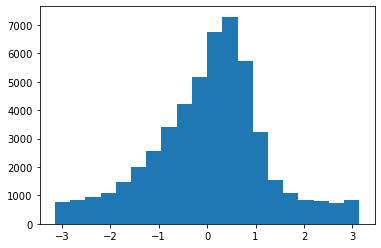

In [11]:
plt.hist(angles, bins=20)

In [12]:
# Create DataArrays for input and output data
input_data = data["REFL_COM_curr"].expand_dims("channel", axis=-1)
output_data = csv_data[["major_axis_length", "minor_axis_length"]].to_array().transpose()

In [15]:
# Display shapes
print(input_data.shape)
print(output_data.shape)

(51346, 144, 144, 1)
(51346, 2)


In [16]:
# Find training indices so that training and validation data are from north-moving storms (angle is positive)
rng = np.random.default_rng()
train_val_indices = np.asarray(np.abs(angles) <= np.pi/2).nonzero()[0]
rng.shuffle(train_val_indices)
split_point = int(0.8 * train_val_indices.shape[0])
train_indices = train_val_indices[:split_point]
val_indices = train_val_indices[split_point:]
test_indices = np.asarray(angles < 0).nonzero()[0]

In [17]:
print(train_indices.shape)
print(val_indices.shape)
print(test_indices.shape)

(33546,)
(8387,)
(22517,)


In [25]:
# Normalize the training input data and actually evaluate the input_train array which will be fed into the network
input_train = input_data[train_indices]
scale_stats = pd.DataFrame(index=[0], columns=["mean", "sd"])
scale_stats.loc[0, "mean"] = input_train.mean()
scale_stats.loc[0, "sd"] = input_train.std()
input_train_norm = (input_train - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]

In [27]:
# Normalize the validation data
input_val = input_data[val_indices]
input_val_norm = (input_val - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]

In [28]:
# Normalize the test input data and generate the test dataset
input_test = input_data[test_indices]
input_test_norm = (input_test - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]

In [21]:
# Split output into train, test, and validation sets
output_train = output_data[train_indices]
output_val = output_data[val_indices]
output_test = output_data[test_indices]

In [22]:
# Normalize the output data
output_scale_stats = pd.DataFrame(index=range(output_train.shape[-1]), columns=["mean", "sd"])
output_scale_stats.loc[:, "mean"] = output_train.mean(dim="p")
output_scale_stats.loc[:, "sd"] = output_train.std(dim="p")
output_train_norm = xr.DataArray(coords=output_train.coords, dims=output_train.dims)
output_val_norm = xr.DataArray(coords=output_val.coords, dims=output_val.dims)
output_test_norm = xr.DataArray(coords=output_test.coords, dims=output_test.dims)
for i in range(output_train.shape[-1]):
    output_train_norm[:, i] = (output_train[:, i] - output_scale_stats.loc[i, "mean"]) / output_scale_stats.loc[i, "sd"]
    output_val_norm[:, i] = (output_val[:, i] - output_scale_stats.loc[i, "mean"]) / output_scale_stats.loc[i, "sd"]
    output_test_norm[:, i] = (output_test[:, i] - output_scale_stats.loc[i, "mean"]) / output_scale_stats.loc[i, "sd"]

In [30]:
def aug_da(da, concat_dim='p', rot=True):
    length = da[concat_dim].shape[0]
    aug_da = xr.concat([da]*4, dim=concat_dim)
    if rot:
        for k in range(4):
            aug_da.values[k*length:(k+1)*length] = np.rot90(aug_da.values[k*length:(k+1)*length], axes=(1, 2), k=k)
    aug_da[concat_dim] = np.arange(aug_da[concat_dim].shape[0])
    return aug_da

In [31]:
aug_input_train_norm = aug_da(input_train_norm)
aug_output_train_norm = aug_da(output_train_norm, rot=False)

In [32]:
ricnn_model = models.Sequential()
ricnn_model.add(GDL_layers.RotEquivConv2D(32, (3, 3), rot_axis=False, input_shape=(144, 144, 1)))
ricnn_model.add(GDL_layers.RotEquivPool2D((2, 2)))
ricnn_model.add(GDL_layers.RotEquivConv2D(32, (3, 3)))
ricnn_model.add(GDL_layers.RotEquivPool2D((2, 2)))
ricnn_model.add(GDL_layers.RotEquivConv2D(64, (3, 3)))
ricnn_model.add(GDL_layers.RotEquivPool2D((2, 2)))
ricnn_model.add(GDL_layers.RotEquivConv2D(64, (3, 3)))
ricnn_model.add(GDL_layers.RotEquivPool2D((2, 2)))
ricnn_model.add(GDL_layers.RotEquivConv2D(128, (3, 3)))
ricnn_model.add(GDL_layers.RotInvPool())
ricnn_model.add(layers.Flatten())
ricnn_model.add(layers.Dense(32, activation='relu'))
ricnn_model.add(layers.Dense(2))

2022-08-29 10:17:22.786884: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-29 10:17:25.859845: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30988 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:62:00.0, compute capability: 7.0


In [33]:
ricnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rot_equiv_conv2d (RotEquivC  (None, 142, 142, 4, 32)  320       
 onv2D)                                                          
                                                                 
 rot_equiv_pool2d (RotEquivP  (None, 71, 71, 4, 32)    0         
 ool2D)                                                          
                                                                 
 rot_equiv_conv2d_1 (RotEqui  (None, 69, 69, 4, 32)    9248      
 vConv2D)                                                        
                                                                 
 rot_equiv_pool2d_1 (RotEqui  (None, 34, 34, 4, 32)    0         
 vPool2D)                                                        
                                                                 
 rot_equiv_conv2d_2 (RotEqui  (None, 32, 32, 4, 64)    1

In [34]:
ricnn_model.compile(
    optimizer='adam',
    loss='mse'
)

In [35]:
ricnn_history = ricnn_model.fit(x=input_train_norm, y=output_train_norm, epochs=10, validation_data=(input_val_norm, output_val_norm))

Epoch 1/10


2022-08-29 10:17:36.157852: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


1049/1049 [==============================] - 97s 75ms/step - loss: 0.2644 - val_loss: 0.1369
Epoch 2/10
1049/1049 [==============================] - 78s 74ms/step - loss: 0.1176 - val_loss: 0.1284
Epoch 3/10
1049/1049 [==============================] - 78s 75ms/step - loss: 0.0827 - val_loss: 0.0757
Epoch 4/10
1049/1049 [==============================] - 78s 75ms/step - loss: 0.0643 - val_loss: 0.1160
Epoch 5/10
1049/1049 [==============================] - 78s 75ms/step - loss: 0.0526 - val_loss: 0.0711
Epoch 6/10
1049/1049 [==============================] - 78s 75ms/step - loss: 0.0497 - val_loss: 0.0666
Epoch 7/10
1049/1049 [==============================] - 78s 75ms/step - loss: 0.0433 - val_loss: 0.0686
Epoch 8/10
1049/1049 [==============================] - 78s 74ms/step - loss: 0.0368 - val_loss: 0.0866
Epoch 9/10
1049/1049 [==============================] - 78s 75ms/step - loss: 0.0392 - val_loss: 0.0708
Epoch 10/10
1049/1049 [==============================] - 79s 75ms/step - lo

In [36]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(144, 144, 1)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(32, activation='relu'))
cnn_model.add(layers.Dense(2))

In [37]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 142, 142, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 71, 71, 32)       0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)      

In [38]:
cnn_model.compile(
    optimizer='adam',
    loss='mse',
)

In [39]:
cnn_history = cnn_model.fit(x=input_train_norm, y=output_train_norm, epochs=10, validation_data=(input_val_norm, output_val_norm))

Epoch 1/10
1049/1049 [==============================] - 19s 18ms/step - loss: 0.2750 - val_loss: 0.2265
Epoch 2/10
1049/1049 [==============================] - 18s 17ms/step - loss: 0.1641 - val_loss: 0.1296
Epoch 3/10
1049/1049 [==============================] - 18s 17ms/step - loss: 0.1296 - val_loss: 0.1246
Epoch 4/10
1049/1049 [==============================] - 18s 17ms/step - loss: 0.1010 - val_loss: 0.1189
Epoch 5/10
1049/1049 [==============================] - 16s 15ms/step - loss: 0.0836 - val_loss: 0.0980
Epoch 6/10
1049/1049 [==============================] - 16s 15ms/step - loss: 0.0835 - val_loss: 0.0899
Epoch 7/10
1049/1049 [==============================] - 19s 18ms/step - loss: 0.0610 - val_loss: 0.0914
Epoch 8/10
1049/1049 [==============================] - 22s 21ms/step - loss: 0.0520 - val_loss: 0.1013
Epoch 9/10
1049/1049 [==============================] - 18s 17ms/step - loss: 0.0472 - val_loss: 0.0728
Epoch 10/10
1049/1049 [==============================] - 16s 15m

In [40]:
aug_cnn_model = models.Sequential()
aug_cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(144, 144, 1)))
aug_cnn_model.add(layers.MaxPooling2D((2, 2)))
aug_cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
aug_cnn_model.add(layers.MaxPooling2D((2, 2)))
aug_cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
aug_cnn_model.add(layers.MaxPooling2D((2, 2)))
aug_cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
aug_cnn_model.add(layers.MaxPooling2D((2, 2)))
aug_cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
aug_cnn_model.add(layers.Flatten())
aug_cnn_model.add(layers.Dense(32, activation='relu'))
aug_cnn_model.add(layers.Dense(2))

In [41]:
aug_cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 142, 142, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 71, 71, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 69, 69, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 64)      

In [42]:
aug_cnn_model.compile(
    optimizer='adam',
    loss='mse',
)

In [43]:
aug_cnn_history = aug_cnn_model.fit(x=input_train_norm, y=output_train_norm, epochs=10, validation_data=(input_val_norm, output_val_norm))

Epoch 1/10
1049/1049 [==============================] - 18s 17ms/step - loss: 0.2640 - val_loss: 0.2111
Epoch 2/10
1049/1049 [==============================] - 16s 15ms/step - loss: 0.1762 - val_loss: 0.1826
Epoch 3/10
1049/1049 [==============================] - 16s 15ms/step - loss: 0.1258 - val_loss: 0.1295
Epoch 4/10
1049/1049 [==============================] - 16s 15ms/step - loss: 0.1027 - val_loss: 0.1187
Epoch 5/10
1049/1049 [==============================] - 18s 17ms/step - loss: 0.0820 - val_loss: 0.0978
Epoch 6/10
1049/1049 [==============================] - 16s 15ms/step - loss: 0.0690 - val_loss: 0.0980
Epoch 7/10
1049/1049 [==============================] - 17s 16ms/step - loss: 0.0583 - val_loss: 0.1156
Epoch 8/10
1049/1049 [==============================] - 16s 16ms/step - loss: 0.0542 - val_loss: 0.0922
Epoch 9/10
1049/1049 [==============================] - 16s 15ms/step - loss: 0.0465 - val_loss: 0.0953
Epoch 10/10
1049/1049 [==============================] - 16s 16m

(0.0, 0.28716947957873346)

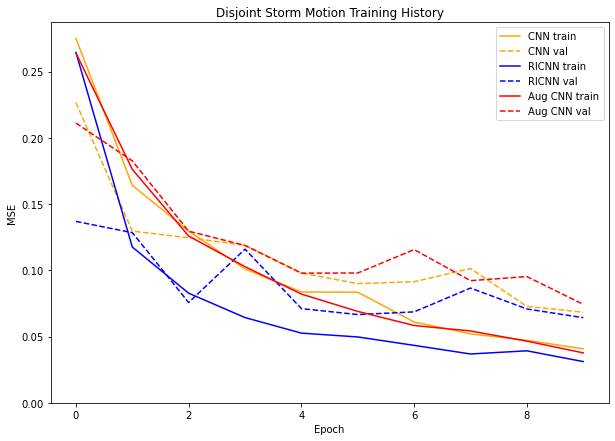

In [44]:
F, ax = plt.subplots(1, 1, figsize=(10,7))
ax = plt.gca()
a = ax.plot(cnn_history.history['loss'], label='CNN train', color='orange')
b = ax.plot(cnn_history.history['val_loss'], label='CNN val', color='orange', linestyle='dashed')
c = ax.plot(ricnn_history.history['loss'], label='RICNN train', color='blue')
d = ax.plot(ricnn_history.history['val_loss'], label='RICNN val', color='blue', linestyle='dashed')
e = ax.plot(aug_cnn_history.history['loss'], label='Aug CNN train', color='red')
f = ax.plot(aug_cnn_history.history['val_loss'], label='Aug CNN val', color='red', linestyle='dashed')
ax.legend()
ax.set_title("Disjoint Storm Motion Training History")
ax.set_xlabel("Epoch")
ax.set_ylabel("MSE")
ax.set_ylim(bottom=0)

In [48]:
ricnn_model.evaluate(input_train_norm, output_train_norm)
ricnn_model.evaluate(input_val_norm, output_val_norm)
ricnn_model.evaluate(input_test_norm, output_test_norm)

704/704 [==============================] - 19s 27ms/step - loss: 0.0255


0.025523366406559944

In [49]:
cnn_model.evaluate(input_train_norm, output_train_norm)
cnn_model.evaluate(input_val_norm, output_val_norm)
cnn_model.evaluate(input_test_norm, output_test_norm)

704/704 [==============================] - 7s 9ms/step - loss: 0.0281


0.028083663433790207

In [50]:
aug_cnn_model.evaluate(input_train_norm, output_train_norm)
aug_cnn_model.evaluate(input_val_norm, output_val_norm)
aug_cnn_model.evaluate(input_test_norm, output_test_norm)

704/704 [==============================] - 6s 8ms/step - loss: 0.0333


0.03328163921833038